In [7]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:
%%writefile code_1.stan

generated quantities {
    int<lower=1> N = 50;
    int<lower=0, upper=N> y;
    real<lower=0, upper=1> p;
    
    p = normal_rng(0, 1);
    y = binomial_rng(N, p);
}

Overwriting code_1.stan


In [27]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /root/Data_Analytics/lab3/code_1.stan to exe file /root/Data_Analytics/lab3/code_1
INFO:cmdstanpy:compiled model executable: /root/Data_Analytics/lab3/code_1


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


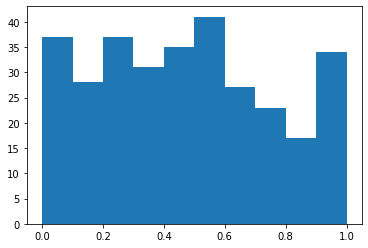

ratio = 0       NaN
1      0.94
2       NaN
3       NaN
4       NaN
       ... 
995    0.48
996     NaN
997     NaN
998     NaN
999     NaN
Length: 1000, dtype: float64


,N,y,p
0,0.0,0.0,0.000000
1,50.0,47.0,0.944038
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
...,...,...,...
995,50.0,24.0,0.443737
996,0.0,0.0,0.000000
997,0.0,0.0,0.000000
998,0.0,0.0,0.000000


In [42]:
# Generate 1000 samples
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000)

draws = samples.draws()[:, :, 2:]
df = pd.DataFrame(draws.reshape((1000, 3)))
df.columns = samples.column_names[2:]
ratio = df['y'] / df['N']

# plt.hist(df['y'])
plt.hist(ratio)
plt.show()
print(f"ratio = {ratio}")
df